# Creating a Stress Detection Tool using Data From Subreddits: Pre-Processing & Modeling

In this notebook I will be trying two different vectorizers on the training and test sets across three different models.  The first vectorizer I will be using is the Count vectorizer.  As its name implies, this vectorizer counts the occurences of each word and the more frequently a word occurs, the more statistically significant it identifies it as.  The second vectorizer I will be using is tf-idf, or term frequency - inverse document frequency.  Like the Count vectorizer, tf-idf also counts the frequency of the words, but tf-idf also calculates a value for how significant each word based on additional factors.  The three models I have chosen to try are the Naive Bayes, Logistic Regression, and Decision Tree models.  

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier


import matplotlib.pyplot as plt
import scikitplot as skplt

import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Import dataframe from pickle

In [3]:
df = pd.read_pickle('df.pickle')

## First training set:
* In the first set I am testing I will be using Count vectors

#### Define x and y

In [4]:
x=df['text']
y=df['stress_label']

#### Define vectorizer, stopwords

In [5]:
vect=CountVectorizer(stop_words="english")

#### Train/test split x and y

In [6]:
x=vect.fit_transform(x)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

#### Dummy Classifier

In [8]:
clf_dummy = DummyClassifier(random_state=42) 
clf_dummy.fit(x_train, y_train)
y_pred = clf_dummy.predict(x_test)

In [9]:
print("Dummy Classifier using Count vectors Accuracy is {p}%".format(p =round (accuracy_score(y_pred,y_test)*100, 2)))

Dummy Classifier using Count vectors Accuracy is 64.23%


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   no stress       0.64      1.00      0.78       826
      stress       0.00      0.00      0.00       460

    accuracy                           0.64      1286
   macro avg       0.32      0.50      0.39      1286
weighted avg       0.41      0.64      0.50      1286



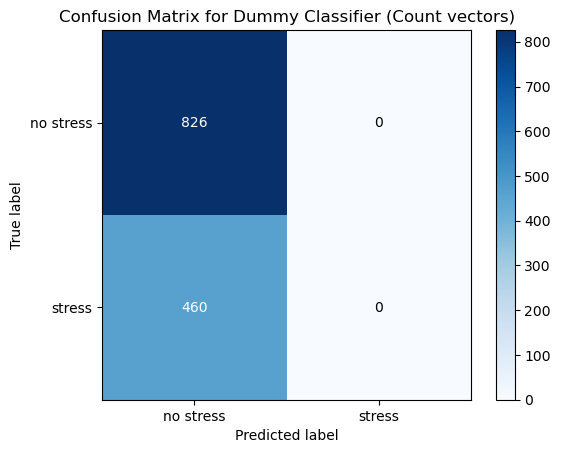

In [11]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for Dummy Classifier (Count vectors)')
plt.show()

* Here I am checking the value counts to make sure the confusion matrix results make sense

In [12]:
y_train.value_counts(normalize=True)

no stress    0.637613
stress       0.362387
Name: stress_label, dtype: float64

#### Naive Bayes

In [13]:
mb=MultinomialNB()
m1=mb.fit(x_train,y_train).predict(x_test)

In [14]:
print("Naive Bayes Model using Count vectors Accuracy is {p}%".format(p =round (accuracy_score(m1,y_test)*100, 2)))

Naive Bayes Model using Count vectors Accuracy is 79.24%


In [15]:
print(classification_report(y_test, m1))

              precision    recall  f1-score   support

   no stress       0.93      0.73      0.82       826
      stress       0.65      0.91      0.76       460

    accuracy                           0.79      1286
   macro avg       0.79      0.82      0.79      1286
weighted avg       0.83      0.79      0.80      1286



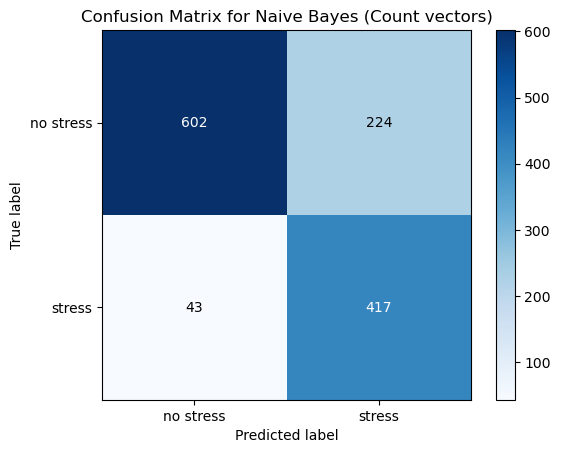

In [16]:
skplt.metrics.plot_confusion_matrix(y_test, m1, normalize=False, title = 'Confusion Matrix for Naive Bayes (Count vectors)')
plt.show()

#### Logistic Regression

In [17]:
m2 = LogisticRegression()
m2.fit(x_train, y_train)
score = m2.score(x_test,y_test)
y_pred = m2.predict(x_test)

In [18]:
print("Logistic Regression Model using Count vectors Accuracy is {p}%".format(p =round (score*100, 2)))

Logistic Regression Model using Count vectors Accuracy is 80.95%


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   no stress       0.84      0.87      0.85       826
      stress       0.75      0.71      0.73       460

    accuracy                           0.81      1286
   macro avg       0.79      0.79      0.79      1286
weighted avg       0.81      0.81      0.81      1286



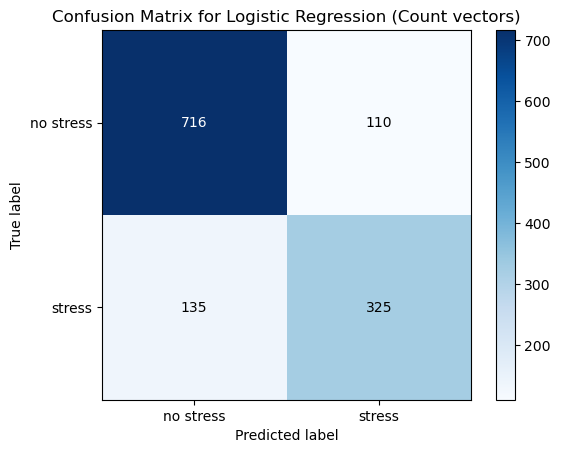

In [20]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for Logistic Regression (Count vectors)')
plt.show()

#### Decision Tree

In [21]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
m3=d.predict(x_test)

In [22]:
print("Decision Tree Model using Count vectors Accuracy is {p}%".format(p =round (accuracy_score(y_test,m3)*100, 2)))

Decision Tree Model using Count vectors Accuracy is 71.15%


In [23]:
print(classification_report(y_test, m3))

              precision    recall  f1-score   support

   no stress       0.76      0.80      0.78       826
      stress       0.61      0.56      0.58       460

    accuracy                           0.71      1286
   macro avg       0.68      0.68      0.68      1286
weighted avg       0.71      0.71      0.71      1286



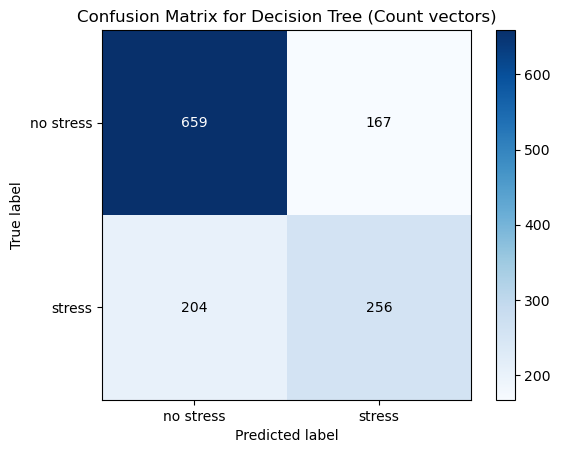

In [24]:
skplt.metrics.plot_confusion_matrix(y_test, m3, normalize=False, title = 'Confusion Matrix for Decision Tree (Count vectors)')
plt.show()

#### Testing the models
* Here I will enter a sentence that I as the user know to be positive to see what the models do

In [25]:
user_input = input("Enter a sentence: ")

Enter a sentence: I am very excited for the day! Today will be amazing


#### Naive Bayes

In [26]:
p = vect.transform([user_input]).toarray()
op = mb.predict(p)
print("Using the Naive Bayes model...")
if op == 'stress':
    print("...This input indicated that the user is stressed")
if op == 'no stress':
    print("...This input indicated that the user is NOT stressed")

Using the Naive Bayes model...
...This input indicated that the user is NOT stressed


#### Logistic Regression

In [27]:
p = vect.transform([user_input]).toarray()
op = m2.predict(p)
print("Using the Logistic Regression model...")
if op == 'stres':
    print("...This input indicated that the user is stressed")
if op == 'no stress':
    print("...This input indicated that the user is NOT stressed")

Using the Logistic Regression model...
...This input indicated that the user is NOT stressed


#### Decision Tree

In [28]:
p = vect.transform([user_input]).toarray()
op = d.predict(p)
print("Using the Decision Tree model...")
if op == 'stress':
    print("...This input indicated that the user is stressed")
if op == 'no stress':
    print("...This input indicated that the user is NOT stressed")

Using the Decision Tree model...
...This input indicated that the user is stressed


## Second training set:
* In the second set I am testing I will be using tf-idf vectors

#### Define vectorizer

In [29]:
vectorizer = TfidfVectorizer(stop_words="english")

#### Define x and y

In [30]:
x=df['text']
y=df['stress_label']

#### Train/test split x and y

In [31]:
X_tfidf = vectorizer.fit_transform(x)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42)

#### Dummy Classifier

In [33]:
clf_dummy = DummyClassifier(random_state=42) 
clf_dummy.fit(x_train, y_train)
y_pred = clf_dummy.predict(x_test)

In [34]:
print("Dummy Classifier using tf-idf Accuracy is {p}%".format(p =round (accuracy_score(y_pred,y_test)*100, 2)))

Dummy Classifier using tf-idf Accuracy is 64.05%


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   no stress       0.64      1.00      0.78      1087
      stress       0.00      0.00      0.00       610

    accuracy                           0.64      1697
   macro avg       0.32      0.50      0.39      1697
weighted avg       0.41      0.64      0.50      1697



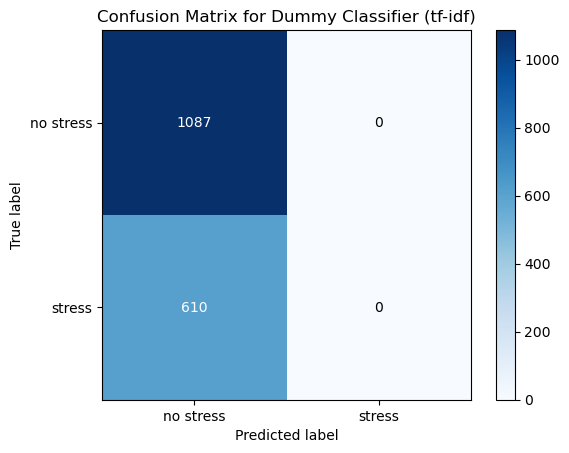

In [36]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for Dummy Classifier (tf-idf)')
plt.show()

* Here I am checking the value counts to make sure the confusion matrix results make sense

In [37]:
y_train.value_counts(normalize=True)

no stress    0.637921
stress       0.362079
Name: stress_label, dtype: float64

#### Naive Bayes

In [38]:
mb=MultinomialNB()
m1=mb.fit(x_train,y_train).predict(x_test)

In [39]:
print("Naive Bayes Model using tf-idf Accuracy is {p}%".format(p =round (accuracy_score(m1,y_test)*100, 2)))

Naive Bayes Model using tf-idf Accuracy is 81.2%


In [40]:
print(classification_report(y_test, m1))

              precision    recall  f1-score   support

   no stress       0.80      0.95      0.87      1087
      stress       0.86      0.57      0.68       610

    accuracy                           0.81      1697
   macro avg       0.83      0.76      0.78      1697
weighted avg       0.82      0.81      0.80      1697



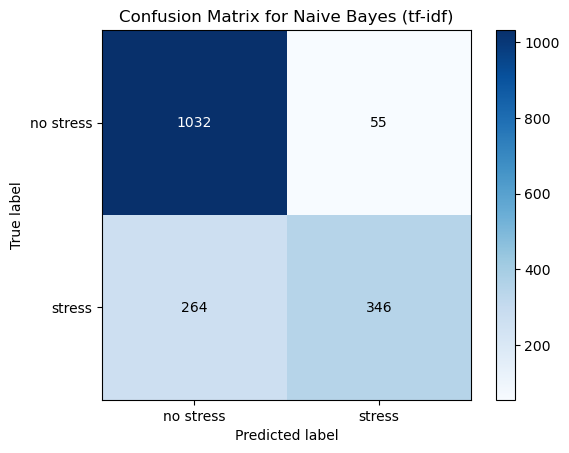

In [41]:
skplt.metrics.plot_confusion_matrix(y_test, m1, normalize=False, title = 'Confusion Matrix for Naive Bayes (tf-idf)')
plt.show()

#### Logistic Regression

In [42]:
m2 = LogisticRegression()
m2.fit(x_train, y_train)
score = m2.score(x_test,y_test)
y_pred = m2.predict(x_test)

In [43]:
print("Logistic Regression Model using tf-idf Accuracy is {p}%".format(p =round (score*100, 2)))

Logistic Regression Model using tf-idf Accuracy is 81.61%


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   no stress       0.81      0.93      0.87      1087
      stress       0.83      0.62      0.71       610

    accuracy                           0.82      1697
   macro avg       0.82      0.77      0.79      1697
weighted avg       0.82      0.82      0.81      1697



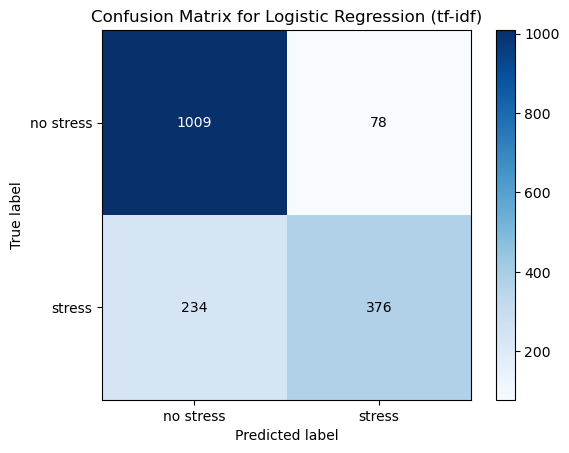

In [45]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for Logistic Regression (tf-idf)')
plt.show()

#### Decision Tree

In [46]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
m3=d.predict(x_test)

In [47]:
print("Decision Tree Model using tf-idf Accuracy is {p}%".format(p =round (accuracy_score(y_test,m3)*100, 2)))

Decision Tree Model using tf-idf Accuracy is 68.83%


In [48]:
print(classification_report(y_test, m3))

              precision    recall  f1-score   support

   no stress       0.76      0.74      0.75      1087
      stress       0.56      0.59      0.58       610

    accuracy                           0.69      1697
   macro avg       0.66      0.67      0.66      1697
weighted avg       0.69      0.69      0.69      1697



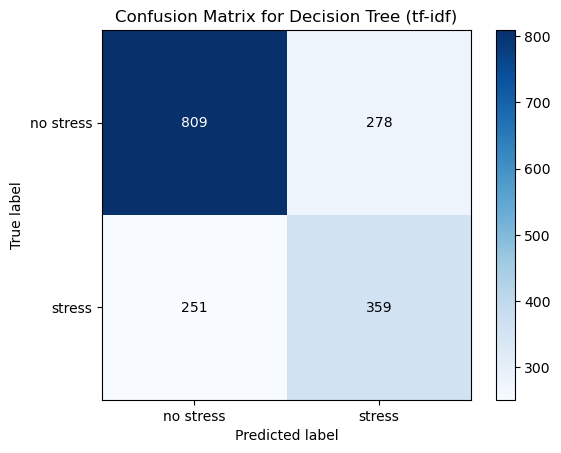

In [49]:
skplt.metrics.plot_confusion_matrix(y_test, m3, normalize=False, title = 'Confusion Matrix for Decision Tree (tf-idf)')
plt.show()

#### Testing the models
* Here I will enter the same exact sentence as above!

In [50]:
user_input = input("Enter a sentence: ")

Enter a sentence: I am very excited for the day! Today will be amazing


#### Naive Bayes

In [51]:
p = vect.transform([user_input]).toarray()
op = mb.predict(p)
print("Using the Naive Bayes model...")
if op == 'stress':
    print("...This input indicated that the user is stressed")
if op == 'no stress':
    print("...This input indicated that the user is NOT stressed")

Using the Naive Bayes model...
...This input indicated that the user is NOT stressed


#### Logistic Regression

In [52]:
p = vect.transform([user_input]).toarray()
op = m2.predict(p)
print("Using the Logistic Regression model...")
if op == 'stres':
    print("...This input indicated that the user is stressed")
if op == 'no stress':
    print("...This input indicated that the user is NOT stressed")

Using the Logistic Regression model...
...This input indicated that the user is NOT stressed


#### Decision Tree

In [53]:
p = vect.transform([user_input]).toarray()
op = d.predict(p)
print("Using the Decision Tree model...")
if op == 'stress':
    print("...This input indicated that the user is stressed")
if op == 'no stress':
    print("...This input indicated that the user is NOT stressed")

Using the Decision Tree model...
...This input indicated that the user is NOT stressed


## Conclusion
* Tf-idf improved the metrics of the logistic regression model while all other models performed better using Count vectors
* All three models accurately assigned 'not stressed' to my test sentence using tf-idf vectors, and only the decision tree model incorrectly assigned 'stress' using Count vectors
* I will be proceeding with the tf-idf vectors and the logistic regression model